# Data Glacier - Week 02

### Import Libraries

In [1]:
# Pandas is necessary for array manipulation and calculation
import pandas as pd
from pandas import DataFrame

# Matplotlib library to create visualizations
import matplotlib.pyplot as plt

# Missingno used for missing data visualization
import missingno as msno

# NumPy necessary for statistical calculations
import numpy as np
np.set_printoptions(threshold=np.inf)

# Change theme of graphs
plt.style.use('fivethirtyeight')

# Export images from Jupyter to PDF
%matplotlib inline

# Import Seaborn to graph distplots and boxplots
import seaborn as sns

from sklearn.linear_model import LinearRegression 

### Import Datasets

In [2]:
# Cleaned cab_data dataset
cab_df = pd.read_csv('C:/Users/Richard/Documents/GitHub/DataGlacier/Week 02/Datasets/cab_data_cleaned.csv')
customer_id = pd.read_csv('C:/Users/Richard/Documents/GitHub/DataGlacier/Week 02/Datasets/customer_ID_cleaned.csv')
transaction_id = pd.read_csv('C:/Users/Richard/Documents/GitHub/DataGlacier/Week 02/Datasets/transaction_ID_cleaned.csv')
nyc_weather = pd.read_csv('C:/Users/Richard/Documents/GitHub/DataGlacier/Week 02/Datasets/nyc_weather_cleaned.csv')

# Cab Data Exploratory Data Analysis

### View Headers

In [3]:
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10002654,1/9/2016,1,WASHINGTON DC,3.54,56.03,48.4272
1,10002655,1/14/2016,1,WASHINGTON DC,28.08,412.28,343.6992
2,10002656,1/9/2016,1,WASHINGTON DC,35.96,665.56,431.5200
3,10002657,1/13/2016,1,WASHINGTON DC,8.96,144.84,118.2720
4,10002658,1/13/2016,1,WASHINGTON DC,18.54,277.71,224.7048


### Verify Data types

In [4]:
cab_df.dtypes

Transaction ID      int64
Date of Travel     object
Company             int64
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

### Check for null values

In [5]:
cab_df.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

### Remove Duplicates

In [6]:
cab_df = cab_df.drop_duplicates()

### Calculate five-number summary including interquartile range

In [7]:
cab_df.describe()

,Transaction ID,Company,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,1.235706,22.567254,423.443311,286.190113
std,1.268058e+05,0.424440,12.233526,274.378911,157.993661
min,1.000001e+07,1.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,1.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,1.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,1.000000,32.960000,583.660000,413.683200
max,1.044011e+07,2.000000,48.000000,2048.030000,691.200000


### Calculate Standard Deviation

In [8]:
cab_df.std()

C:\Users\Richard\AppData\Local\Temp\ipykernel_5828\2159787378.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cab_df.std()


Transaction ID    126805.803715
Company                0.424440
KM Travelled          12.233526
Price Charged        274.378911
Cost of Trip         157.993661
dtype: float64

### Calculate Mode

In [9]:
cab_df.mode(axis=0, numeric_only=False, dropna=True)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,1/5/2018,1.0,NEW YORK NY,33.6,191.27,362.88
1,10000012,NaN,NaN,NaN,NaN,298.32,NaN
2,10000013,NaN,NaN,NaN,NaN,NaN,NaN
3,10000014,NaN,NaN,NaN,NaN,NaN,NaN
4,10000015,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
359387,10440101,NaN,NaN,NaN,NaN,NaN,NaN
359388,10440104,NaN,NaN,NaN,NaN,NaN,NaN
359389,10440105,NaN,NaN,NaN,NaN,NaN,NaN
359390,10440106,NaN,NaN,NaN,NaN,NaN,NaN


### Calculate Skewness

In [10]:
cab_df.skew()

C:\Users\Richard\AppData\Local\Temp\ipykernel_5828\51090141.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cab_df.skew()


Transaction ID    0.000072
Company           1.245382
KM Travelled      0.055779
Price Charged     0.873761
Cost of Trip      0.137958
dtype: float64

### Calculate Kurtosis

In [11]:
kurt = cab_df.kurt(axis=0)
print(kurt)

Transaction ID   -1.198925
Company          -0.449026
KM Travelled     -1.126875
Price Charged     0.747635
Cost of Trip     -1.012233
dtype: float64


C:\Users\Richard\AppData\Local\Temp\ipykernel_5828\421773479.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  kurt = cab_df.kurt(axis=0)


### Calculate Variance

In [12]:
np.var(cab_df, axis = 0)

C:\Users\Richard\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3700: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Transaction ID    1.607967e+10
Company           1.801489e-01
KM Travelled      1.496587e+02
Price Charged     7.528358e+04
Cost of Trip      2.496193e+04
dtype: float64

### Drop object variables from calculations

In [13]:
cab_df_int = cab_df.drop(['Date of Travel', 'Company', 'City'], axis=1)

In [14]:
cab_df_int.dtypes

Transaction ID      int64
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

### Calculate Median

In [15]:
median_array = np.median(cab_df_int, axis=0)
print(median_array)

[1.02210355e+07 2.24400000e+01 3.86360000e+02 2.82480000e+02]


### Calculate Frequency Bins

array([[<AxesSubplot:title={'center':'KM Travelled'}>]], dtype=object)

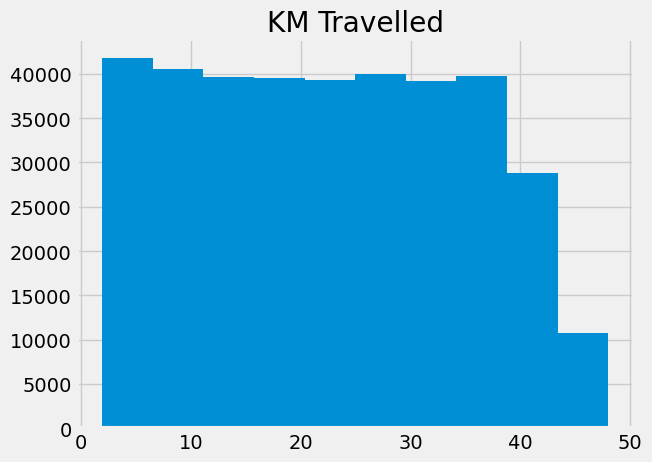

In [16]:
cab_df[['KM Travelled']].hist()

array([[<AxesSubplot:title={'center':'Price Charged'}>]], dtype=object)

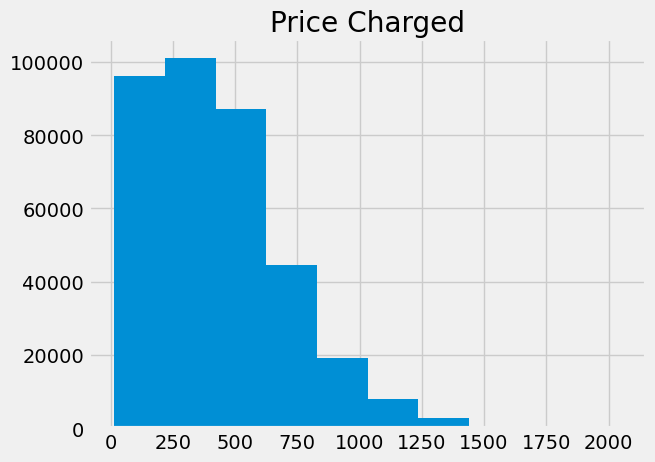

In [17]:
cab_df[['Price Charged']].hist()

array([[<AxesSubplot:title={'center':'Cost of Trip'}>]], dtype=object)

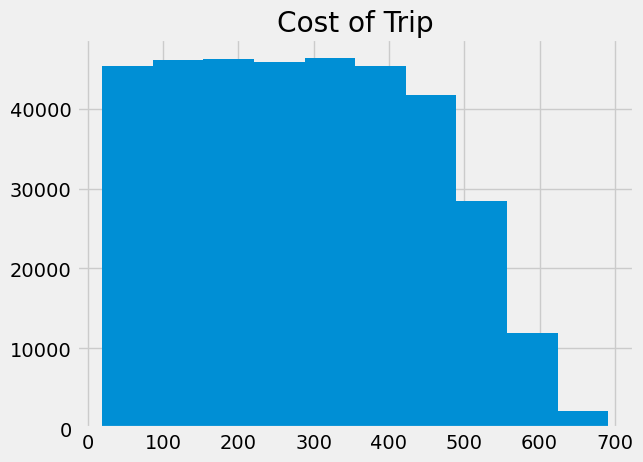

In [18]:
cab_df[['Cost of Trip']].hist()

### Create Univariate Distribution Plots

C:\Users\Richard\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


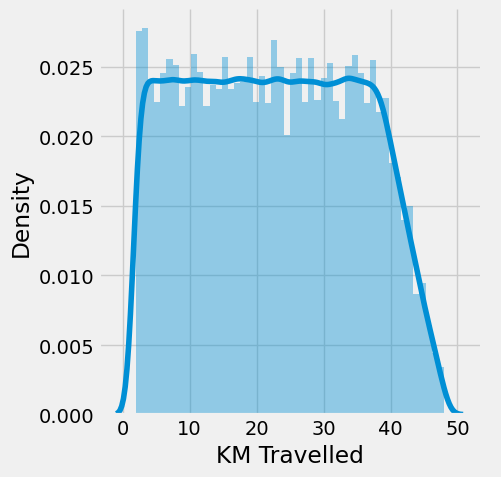

In [19]:
sns.FacetGrid(cab_df,height=5).map(sns.distplot,"KM Travelled").add_legend()

C:\Users\Richard\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


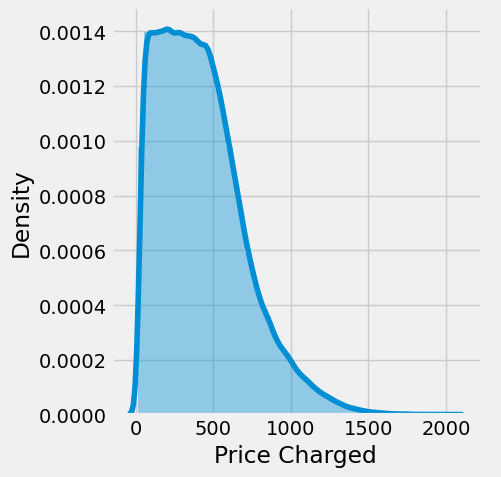

In [20]:
sns.FacetGrid(cab_df,height=5).map(sns.distplot,"Price Charged").add_legend()

C:\Users\Richard\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


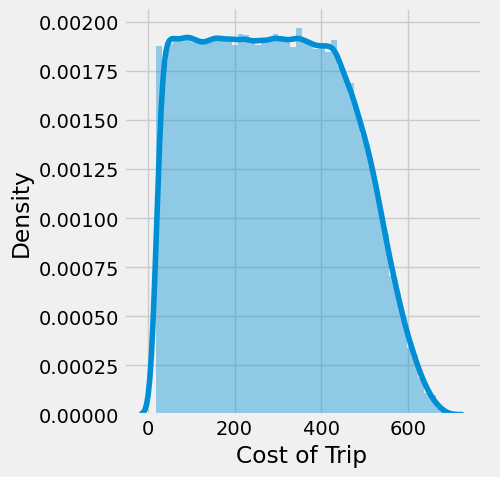

In [21]:
sns.FacetGrid(cab_df,height=5).map(sns.distplot,"Cost of Trip").add_legend()

### Boxplots

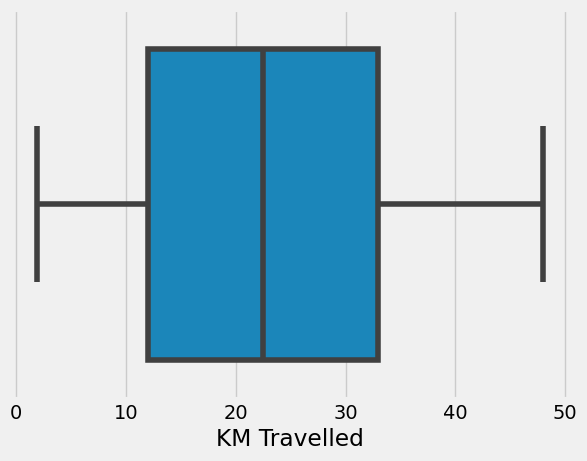

In [22]:
sns.boxplot(x="KM Travelled",data=cab_df)
plt.show()

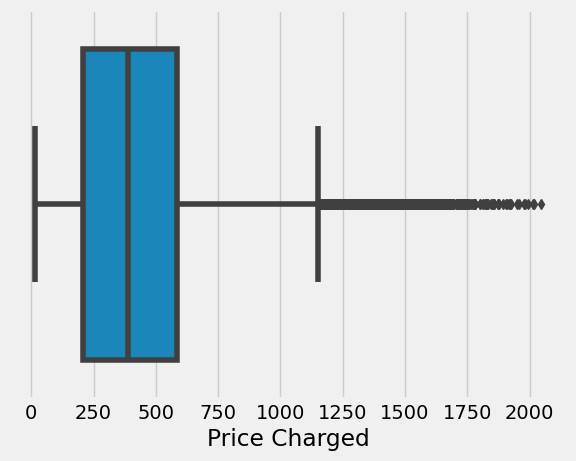

In [23]:
sns.boxplot(x="Price Charged",data=cab_df)
plt.show()

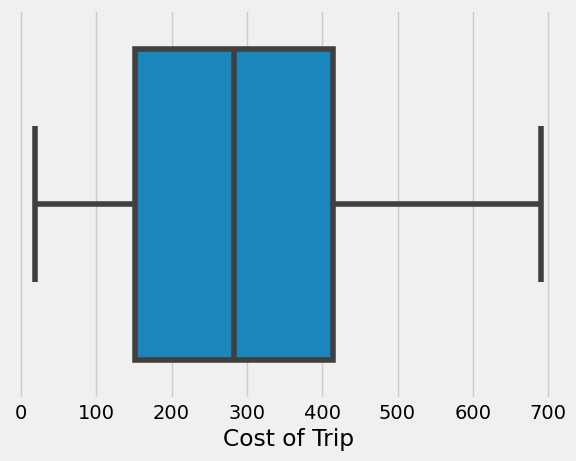

In [24]:
sns.boxplot(x="Cost of Trip",data=cab_df)
plt.show()

# Customer Exploratory Data Analysis

### View Headers

In [25]:
customer_id.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,1,28,10813
1,27703,1,27,9237
2,28712,1,53,11242
3,28020,1,23,23327
4,27182,1,33,8536


### Verify Data Types

In [26]:
customer_id.dtypes

Customer ID           int64
Gender                int64
Age                   int64
Income (USD/Month)    int64
dtype: object

### Check for null values

In [27]:
customer_id.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

### Remove Duplicates

In [28]:
customer_id = customer_id.drop_duplicates()

### Calculate five-number summary including interquartile range

In [29]:
customer_id.describe()

,Customer ID,Gender,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000,49171.000000
mean,28398.252283,1.459804,35.363121,15015.631856
std,17714.137333,0.498387,12.599066,8002.208253
min,1.000000,1.000000,18.000000,2000.000000
25%,12654.500000,1.000000,25.000000,8289.500000
50%,27631.000000,1.000000,33.000000,14656.000000
75%,43284.500000,2.000000,42.000000,21035.000000
max,60000.000000,2.000000,65.000000,35000.000000


### Calculate Standard Deviation

In [30]:
customer_id.std()

Customer ID           17714.137333
Gender                    0.498387
Age                      12.599066
Income (USD/Month)     8002.208253
dtype: float64

### Calculate Mode

In [31]:
customer_id.mode(axis=0, numeric_only=False, dropna=True)

,Customer ID,Gender,Age,Income (USD/Month)
0,1,1.0,20.0,8497.0
1,2,NaN,NaN,NaN
2,3,NaN,NaN,NaN
3,4,NaN,NaN,NaN
4,5,NaN,NaN,NaN
...,...,...,...,...
49166,59996,NaN,NaN,NaN
49167,59997,NaN,NaN,NaN
49168,59998,NaN,NaN,NaN
49169,59999,NaN,NaN,NaN


### Calculate Skewness

In [32]:
customer_id.skew()

Customer ID           0.141494
Gender                0.161313
Age                   0.685934
Income (USD/Month)    0.313148
dtype: float64

### Calculate Kurtosis

In [33]:
c_kurt = customer_id.kurt(axis=0)
print(c_kurt)

Customer ID          -1.192502
Gender               -1.974058
Age                  -0.451938
Income (USD/Month)   -0.672325
dtype: float64


### Calculate Variance

In [34]:
np.var(customer_id, axis=0)

Customer ID           3.137843e+08
Gender                2.483842e-01
Age                   1.587332e+02
Income (USD/Month)    6.403403e+07
dtype: float64

### Calculate Median

In [35]:
np.median(customer_id, axis = 0)

array([2.7631e+04, 1.0000e+00, 3.3000e+01, 1.4656e+04])

### Calculate Frequency Bins

array([[<AxesSubplot:title={'center':'Gender'}>]], dtype=object)

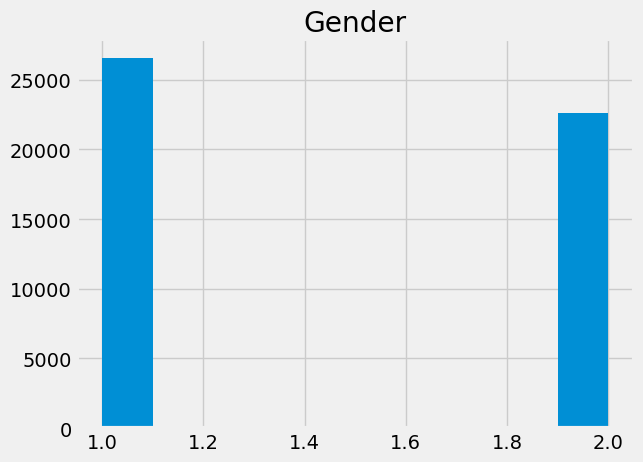

In [36]:
customer_id[["Gender"]].hist()

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

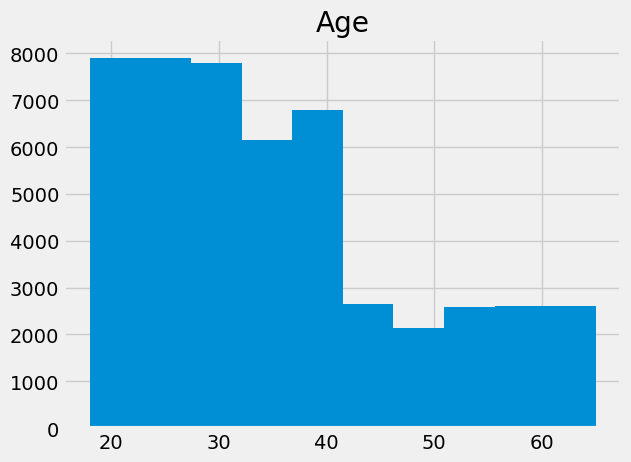

In [37]:
customer_id[["Age"]].hist()

array([[<AxesSubplot:title={'center':'Income (USD/Month)'}>]],
      dtype=object)

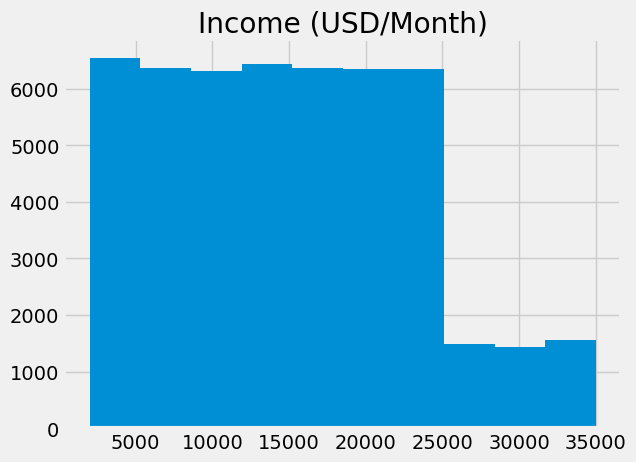

In [38]:
customer_id[["Income (USD/Month)"]].hist()

### Create Univariate Distribution Plots

C:\Users\Richard\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


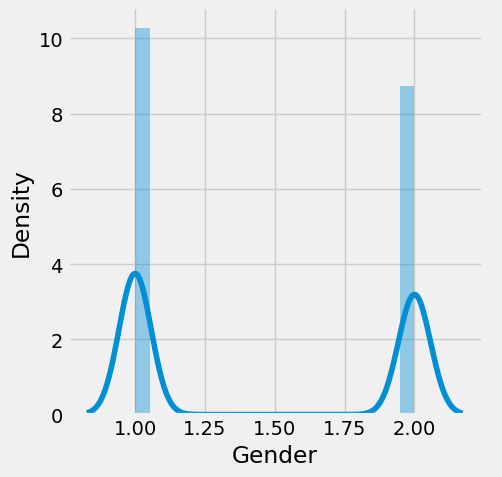

In [39]:
sns.FacetGrid(customer_id,height=5).map(sns.distplot,"Gender").add_legend()

C:\Users\Richard\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


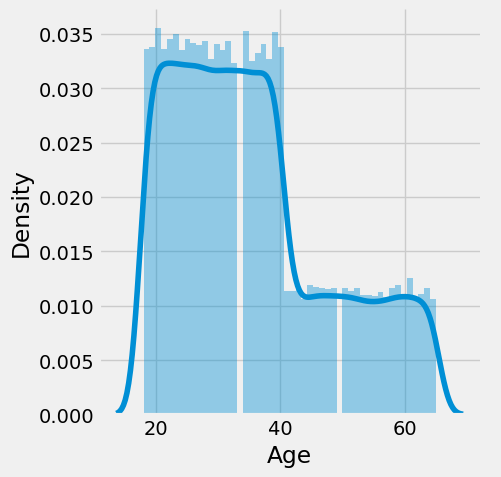

In [40]:
sns.FacetGrid(customer_id,height=5).map(sns.distplot,"Age").add_legend()

C:\Users\Richard\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


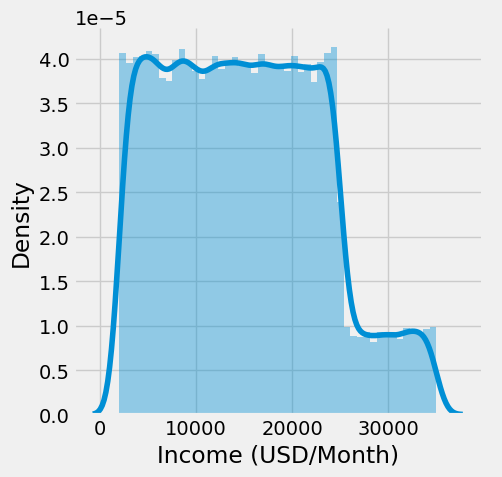

In [41]:
sns.FacetGrid(customer_id,height=5).map(sns.distplot,"Income (USD/Month)").add_legend()

### Boxplots

<AxesSubplot:xlabel='Gender'>

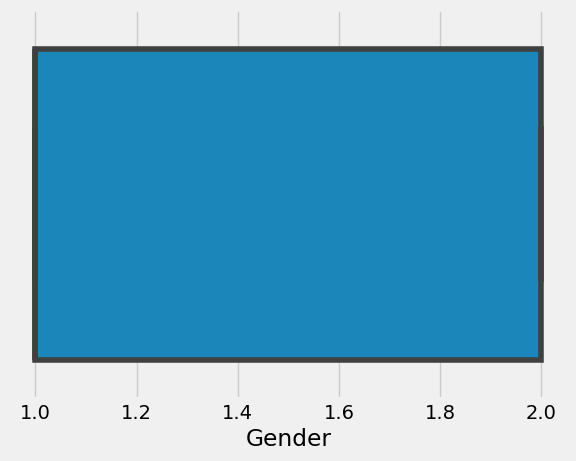

In [42]:
sns.boxplot(x="Gender",data=customer_id)

<AxesSubplot:xlabel='Age'>

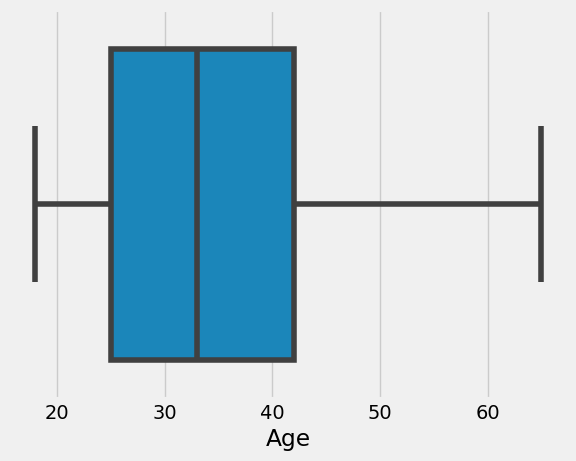

In [43]:
sns.boxplot(x="Age",data=customer_id)

<AxesSubplot:xlabel='Income (USD/Month)'>

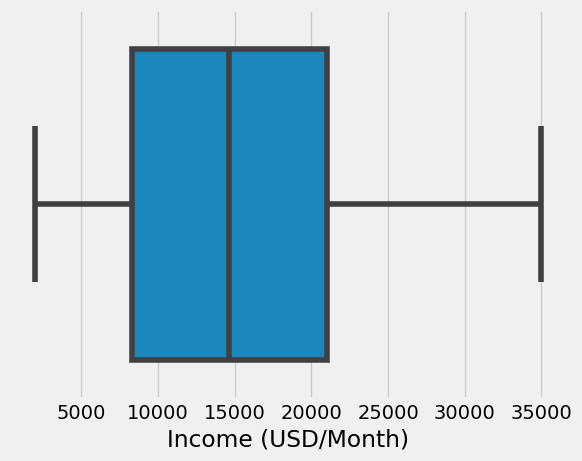

In [44]:
sns.boxplot(x="Income (USD/Month)",data=customer_id)

# Transaction Exploratory Data Analysis

### View Headers

In [45]:
transaction_id.head()

,Transaction ID,Customer ID,Payment_Mode
0,10065547,7594,1
1,10065548,6490,1
2,10065549,8173,2
3,10065550,8191,2
4,10065551,7091,1


### Verify Data Types

In [46]:
transaction_id.dtypes

Transaction ID    int64
Customer ID       int64
Payment_Mode      int64
dtype: object

### Check for Null Values

In [47]:
transaction_id.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

### Remove Duplicates

In [48]:
transaction_id = transaction_id.drop_duplicates()

### Calculate five-number summary including interquartile range

In [49]:
transaction_id.describe()

,Transaction ID,Customer ID,Payment_Mode
count,4.400980e+05,440098.000000,440098.000000
mean,1.022006e+07,23619.513120,1.400154
std,1.270455e+05,21195.549816,0.489930
min,1.000001e+07,1.000000,1.000000
25%,1.011004e+07,3530.000000,1.000000
50%,1.022006e+07,15168.000000,1.000000
75%,1.033008e+07,43884.000000,2.000000
max,1.044011e+07,60000.000000,2.000000


### Calculate Standard Deviation

In [50]:
transaction_id.std()

Transaction ID    127045.493722
Customer ID        21195.549816
Payment_Mode           0.489930
dtype: float64

### Calculate Mode

In [51]:
transaction_id.mode(axis=0, numeric_only=False, dropna=True)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,494.0,1.0
1,10000012,NaN,NaN
2,10000013,NaN,NaN
3,10000014,NaN,NaN
4,10000015,NaN,NaN
...,...,...,...
440093,10440104,NaN,NaN
440094,10440105,NaN,NaN
440095,10440106,NaN,NaN
440096,10440107,NaN,NaN


### Calculate Skewness

In [52]:
transaction_id.skew()

Transaction ID    4.992619e-17
Customer ID       3.411342e-01
Payment_Mode      4.075946e-01
dtype: float64

### Calculate Kurtosis

In [53]:
transaction_id.kurt(axis=0)

Transaction ID   -1.200000
Customer ID      -1.560810
Payment_Mode     -1.833875
dtype: float64

### Calculate Variance

In [54]:
np.var(transaction_id, axis=0)

Transaction ID    1.614052e+10
Customer ID       4.492503e+08
Payment_Mode      2.400308e-01
dtype: float64

### Calculate Median

In [55]:
np.median(transaction_id, axis=0)

array([1.02200595e+07, 1.51680000e+04, 1.00000000e+00])

### Calculate Frequency Bins

array([[<AxesSubplot:title={'center':'Payment_Mode'}>]], dtype=object)

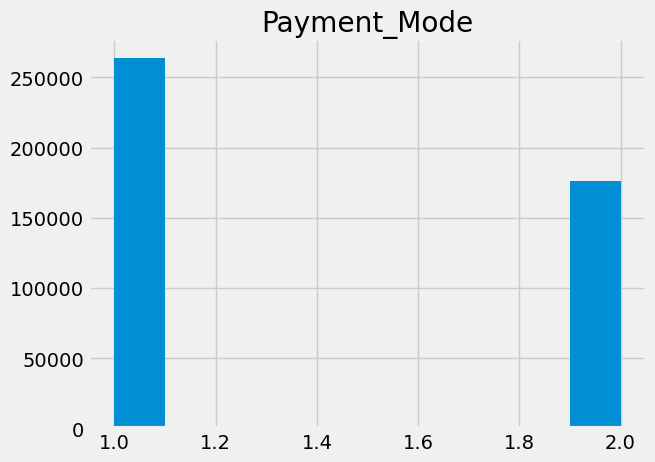

In [56]:
transaction_id[["Payment_Mode"]].hist()

### Create Univariate Distribution Plots

C:\Users\Richard\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


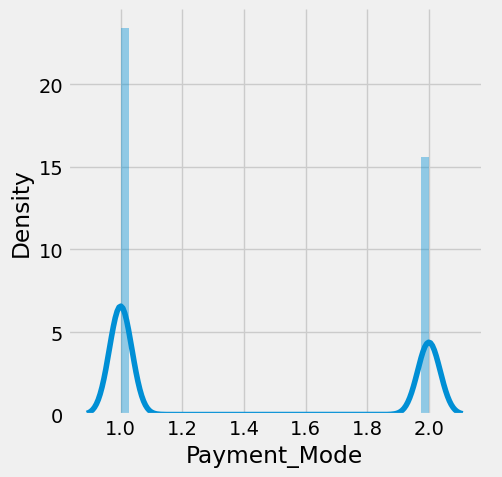

In [57]:
sns.FacetGrid(transaction_id,height=5).map(sns.distplot,"Payment_Mode").add_legend()

### Boxplots

<AxesSubplot:xlabel='Payment_Mode'>

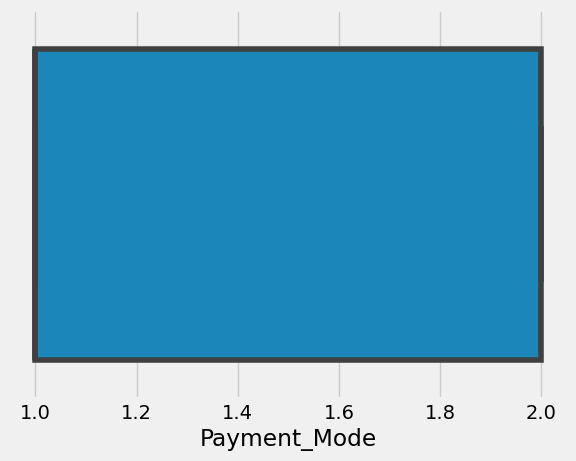

In [58]:
sns.boxplot(x="Payment_Mode",data=transaction_id)

# NYC Weather Dataset Exploratory Data Analysis

In [59]:
nyc_weather.head()

,date,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
0,1/1/2016,42,34,38.0,0.0,0.0,0
1,1/2/2016,40,32,36.0,0.0,0.0,0
2,1/3/2016,45,35,40.0,0.0,0.0,0
3,1/4/2016,36,14,25.0,0.0,0.0,0
4,1/5/2016,29,11,20.0,0.0,0.0,0


### Verify Data Types

In [60]:
nyc_weather.dtypes

date                    object
maximum temperature      int64
minimum temperature      int64
average temperature    float64
precipitation          float64
snow fall              float64
snow depth               int64
dtype: object

### Check for null values

In [61]:
nyc_weather.isnull().sum()

date                   0
maximum temperature    0
minimum temperature    0
average temperature    0
precipitation          0
snow fall              0
snow depth             0
dtype: int64

### Remove Duplicates

In [62]:
nyc_weather = nyc_weather.drop_duplicates()

### Calculate five-number summary including interquartile range

In [63]:
nyc_weather.describe()

,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
count,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000
mean,66.063584,51.078035,58.570809,0.117428,0.101445,0.228324
std,17.442128,16.069495,16.564806,0.316888,1.482408,1.599785
min,15.000000,-1.000000,7.000000,0.000000,0.000000,0.000000
25%,53.000000,39.000000,46.500000,0.000000,0.000000,0.000000
50%,66.000000,50.000000,58.000000,0.000000,0.000000,0.000000
75%,82.000000,66.000000,74.000000,0.030000,0.000000,0.000000
max,96.000000,81.000000,88.500000,2.310000,27.300000,19.000000


### Calculate Standard Deviation

In [64]:
nyc_weather.std()

C:\Users\Richard\AppData\Local\Temp\ipykernel_5828\2737140782.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  nyc_weather.std()


maximum temperature    17.442128
minimum temperature    16.069495
average temperature    16.564806
precipitation           0.316888
snow fall               1.482408
snow depth              1.599785
dtype: float64

### Calculate Mode

In [65]:
nyc_weather.mode(axis=0, numeric_only=False, dropna=True)

,date,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
0,1/1/2016,83.0,40.0,54.0,0.0,0.0,0.0
1,1/10/2016,NaN,NaN,NaN,NaN,NaN,NaN
2,1/11/2016,NaN,NaN,NaN,NaN,NaN,NaN
3,1/13/2016,NaN,NaN,NaN,NaN,NaN,NaN
4,1/15/2016,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
341,9/5/2016,NaN,NaN,NaN,NaN,NaN,NaN
342,9/6/2016,NaN,NaN,NaN,NaN,NaN,NaN
343,9/7/2016,NaN,NaN,NaN,NaN,NaN,NaN
344,9/8/2016,NaN,NaN,NaN,NaN,NaN,NaN


### Calculate Skewness

In [66]:
nyc_weather.skew()

C:\Users\Richard\AppData\Local\Temp\ipykernel_5828\4258595931.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  nyc_weather.skew()


maximum temperature    -0.298999
minimum temperature    -0.233597
average temperature    -0.269476
precipitation           3.983158
snow fall              18.038265
snow depth              9.141424
dtype: float64

### Calculate Kurtosis

In [67]:
nyc_weather.kurt(axis=0)

C:\Users\Richard\AppData\Local\Temp\ipykernel_5828\2438134565.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  nyc_weather.kurt(axis=0)


maximum temperature     -0.803682
minimum temperature     -0.638400
average temperature     -0.729465
precipitation           18.594806
snow fall              331.258527
snow depth              93.278447
dtype: float64

### Calculate Variance

In [68]:
np.var(nyc_weather, axis=0)

C:\Users\Richard\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3700: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


maximum temperature    303.348558
minimum temperature    257.482350
average temperature    273.599755
precipitation            0.100128
snow fall                2.191183
snow depth               2.551915
dtype: float64

### Drop object variables from calculations

In [69]:
nyc_weather = nyc_weather.drop('date', axis=1)

### Calculate Median

In [70]:
np.median(nyc_weather, axis=0)

array([66., 50., 58.,  0.,  0.,  0.])

### Calculate Frequency Bins

array([[<AxesSubplot:title={'center':'maximum temperature'}>]],
      dtype=object)

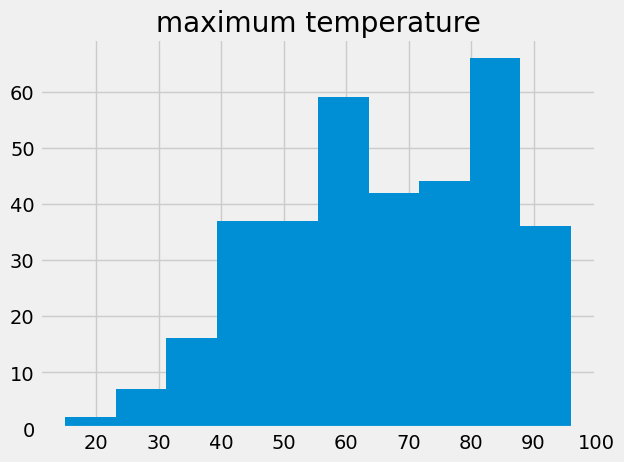

In [71]:
nyc_weather[["maximum temperature"]].hist()

array([[<AxesSubplot:title={'center':'minimum temperature'}>]],
      dtype=object)

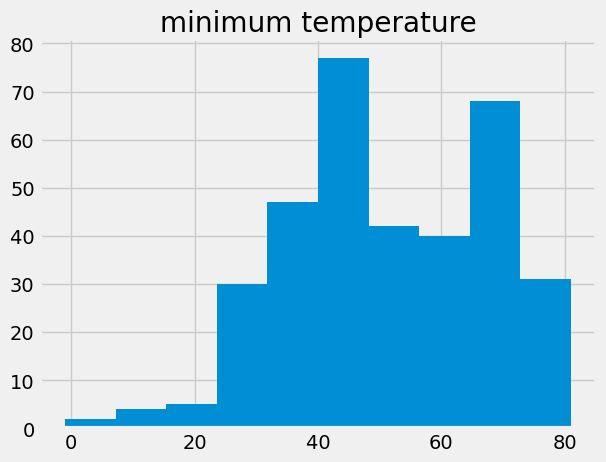

In [72]:
nyc_weather[["minimum temperature"]].hist()

array([[<AxesSubplot:title={'center':'average temperature'}>]],
      dtype=object)

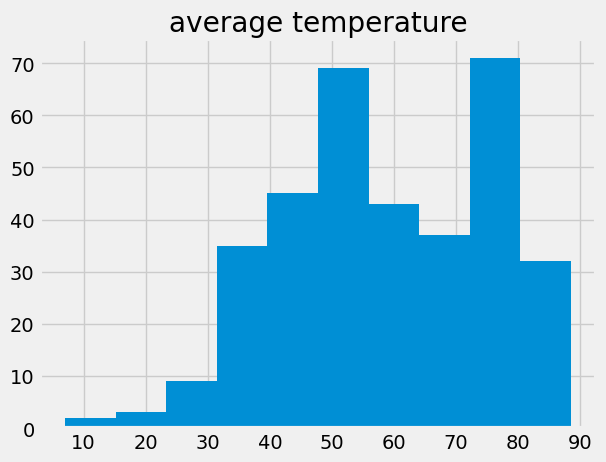

In [73]:
nyc_weather[["average temperature"]].hist()

array([[<AxesSubplot:title={'center':'precipitation'}>]], dtype=object)

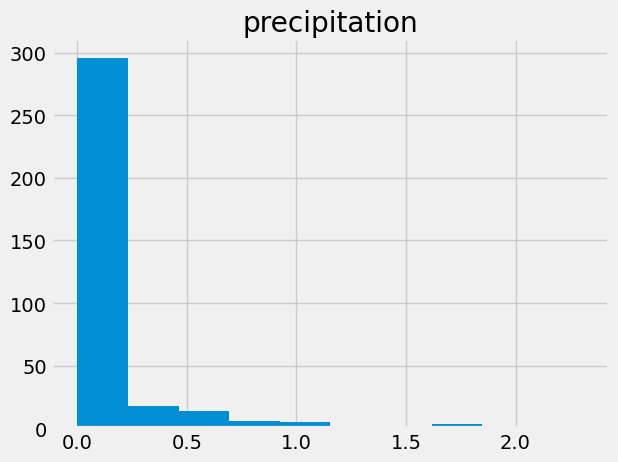

In [74]:
nyc_weather[["precipitation"]].hist()

array([[<AxesSubplot:title={'center':'snow fall'}>]], dtype=object)

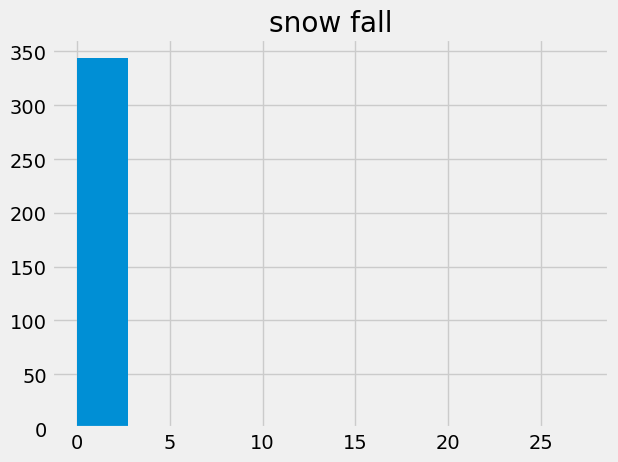

In [75]:
nyc_weather[["snow fall"]].hist()

array([[<AxesSubplot:title={'center':'snow depth'}>]], dtype=object)

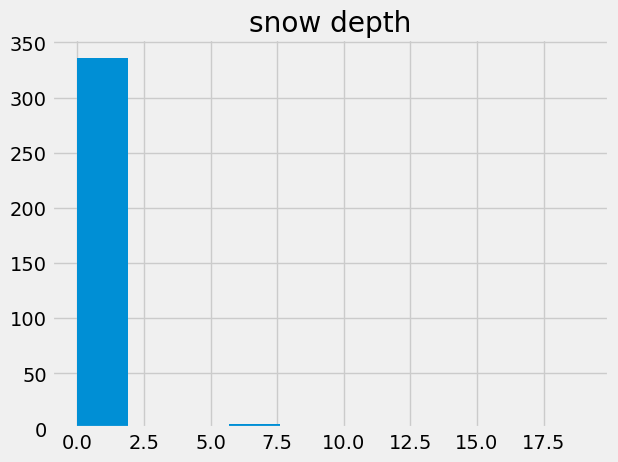

In [76]:
nyc_weather[["snow depth"]].hist()

### Create Univariate Distribution Plots

C:\Users\Richard\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


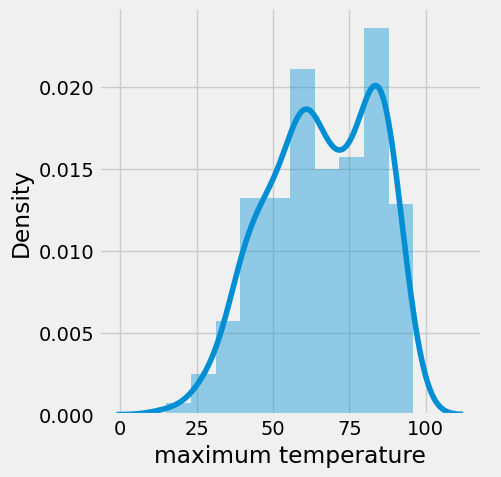

In [77]:
sns.FacetGrid(nyc_weather,height=5).map(sns.distplot,"maximum temperature").add_legend()

C:\Users\Richard\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


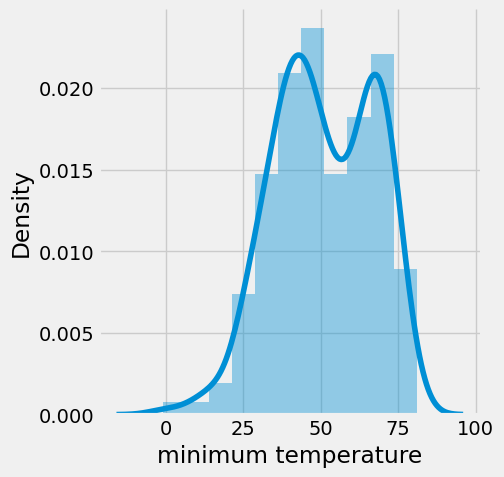

In [78]:
sns.FacetGrid(nyc_weather,height=5).map(sns.distplot,"minimum temperature").add_legend()

C:\Users\Richard\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


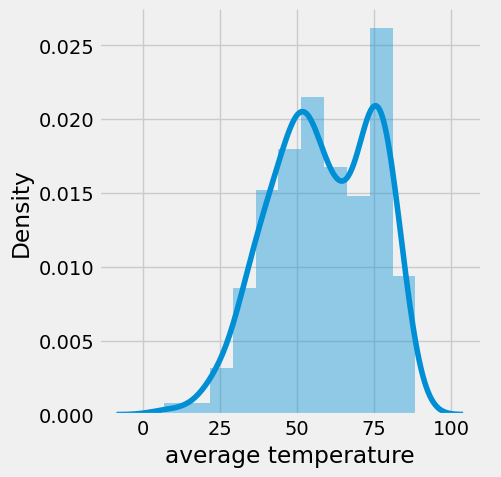

In [79]:
sns.FacetGrid(nyc_weather,height=5).map(sns.distplot,"average temperature").add_legend()

C:\Users\Richard\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


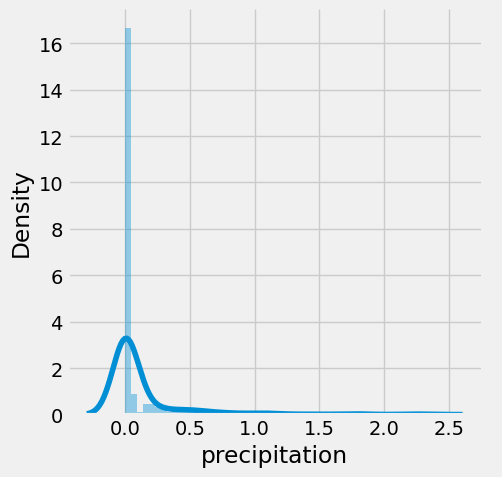

In [80]:
sns.FacetGrid(nyc_weather,height=5).map(sns.distplot,"precipitation").add_legend()

C:\Users\Richard\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


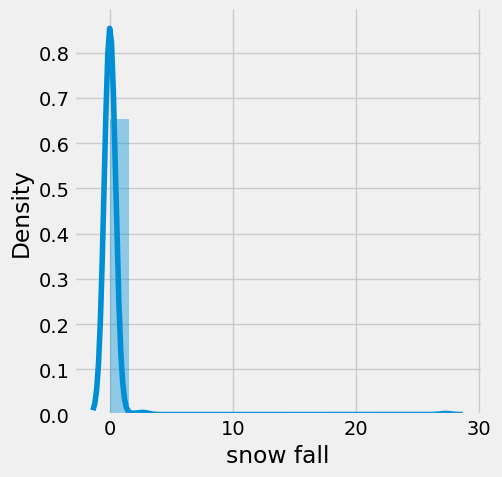

In [81]:
sns.FacetGrid(nyc_weather,height=5).map(sns.distplot,"snow fall").add_legend()

C:\Users\Richard\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


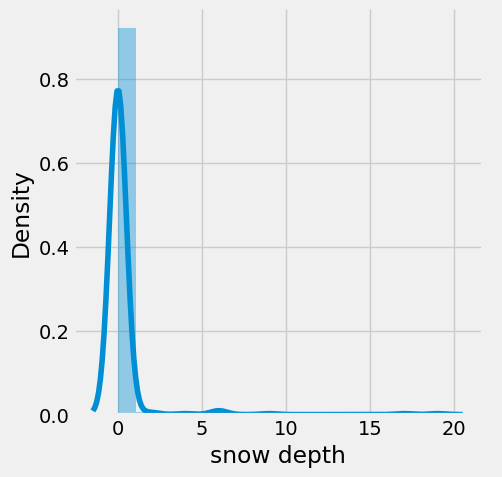

In [82]:
sns.FacetGrid(nyc_weather,height=5).map(sns.distplot,"snow depth").add_legend()

### Boxplots

<AxesSubplot:xlabel='maximum temperature'>

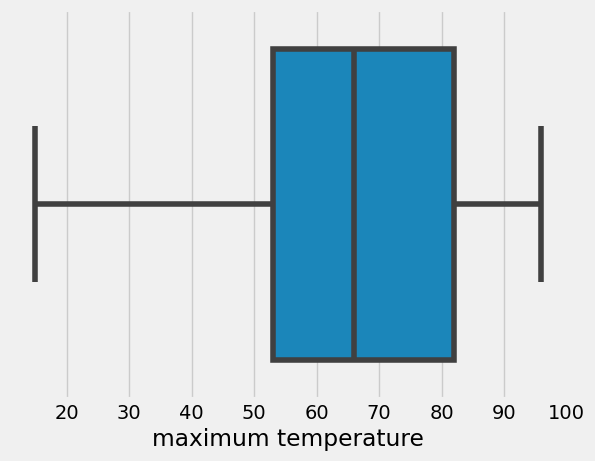

In [83]:
sns.boxplot(x="maximum temperature",data=nyc_weather)

<AxesSubplot:xlabel='minimum temperature'>

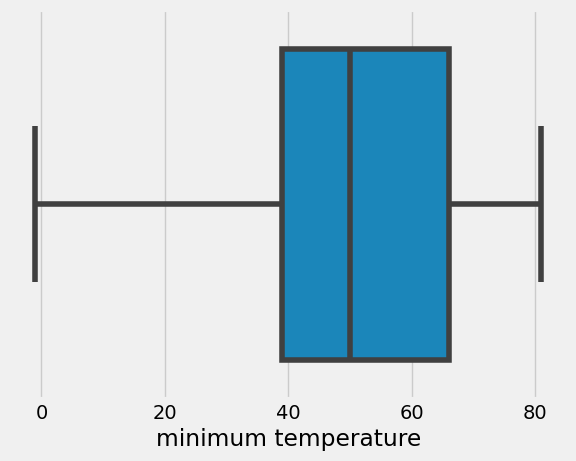

In [84]:
sns.boxplot(x="minimum temperature",data=nyc_weather)

<AxesSubplot:xlabel='average temperature'>

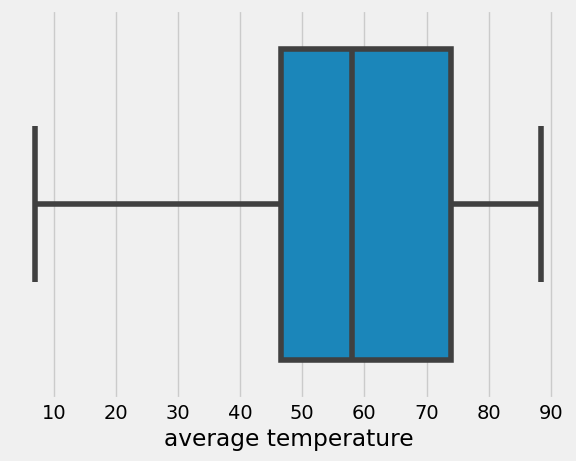

In [85]:
sns.boxplot(x="average temperature",data=nyc_weather)

<AxesSubplot:xlabel='precipitation'>

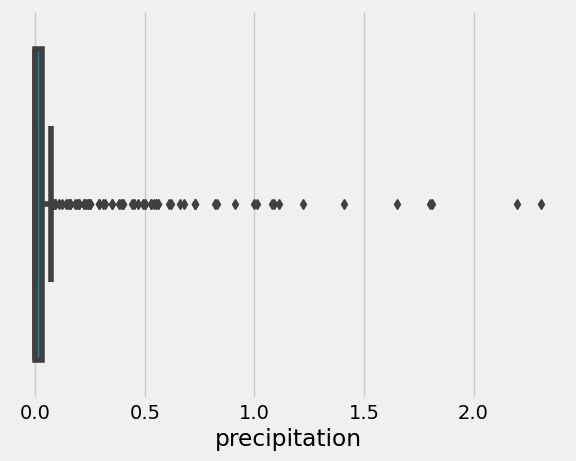

In [86]:
sns.boxplot(x="precipitation",data=nyc_weather)

<AxesSubplot:xlabel='snow fall'>

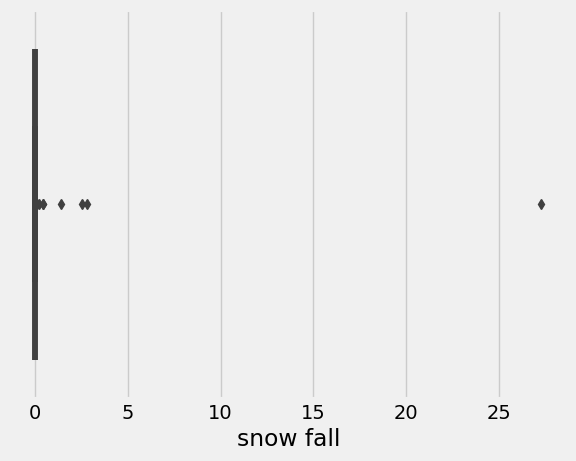

In [87]:
sns.boxplot(x="snow fall",data=nyc_weather)

<AxesSubplot:xlabel='snow depth'>

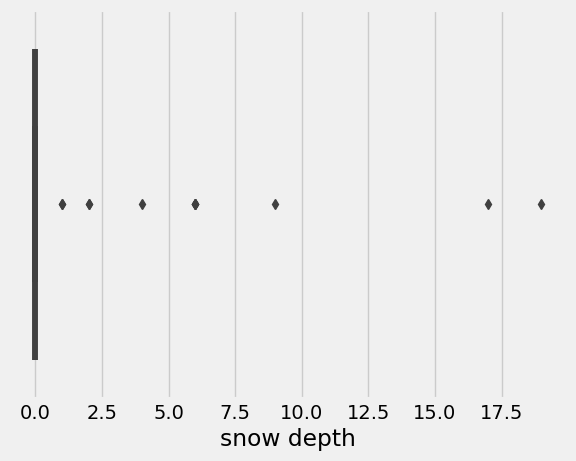

In [88]:
sns.boxplot(x="snow depth",data=nyc_weather)

# Scatterplot and Linear Regression Models

## Price Charged vs KM Travelled

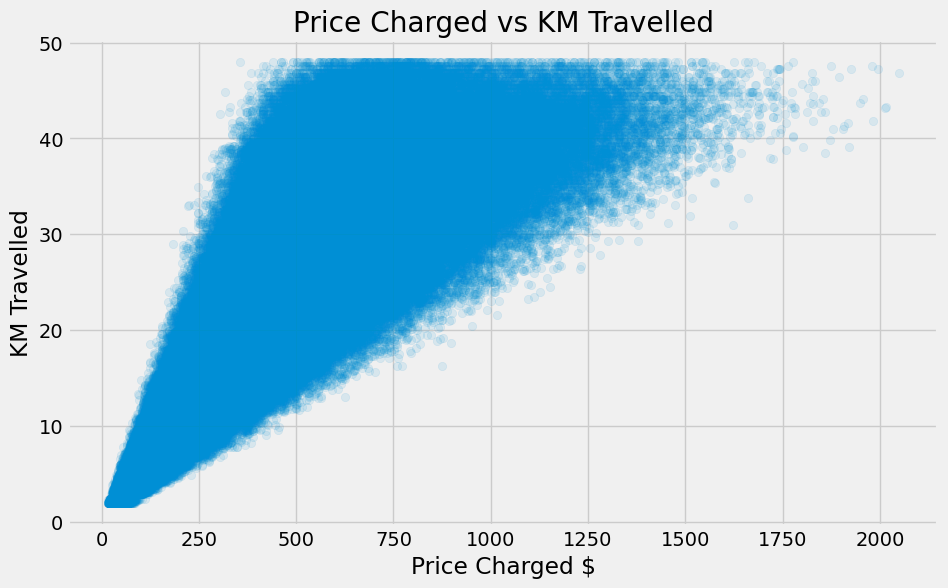

In [89]:
X = DataFrame(cab_df, columns=['Price Charged'])
y = DataFrame(cab_df, columns=['KM Travelled'])

plt.figure(figsize=(10,6))
plt.scatter(X, y, alpha=0.1)
plt.title('Price Charged vs KM Travelled')
plt.xlabel('Price Charged $')
plt.ylabel('KM Travelled')

plt.show()

### Regression Model

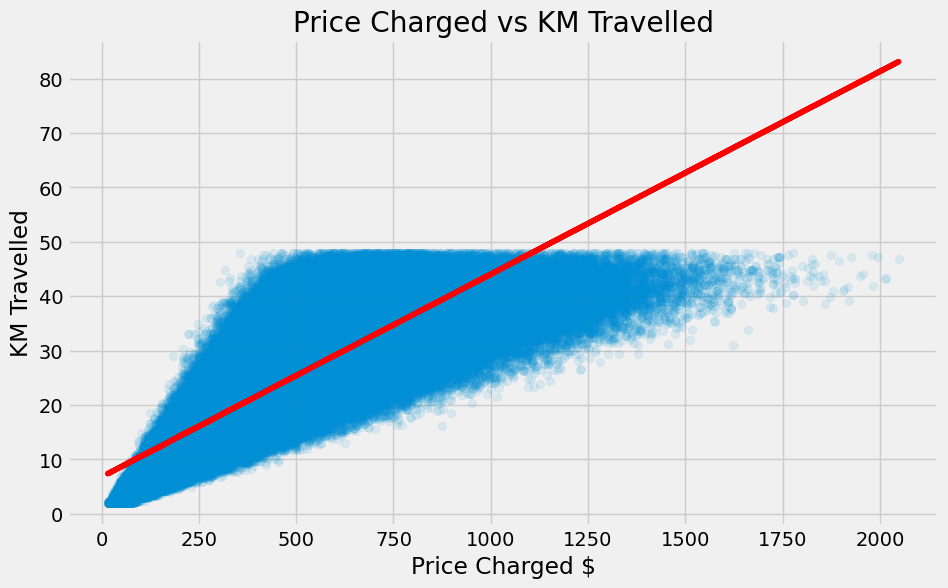

In [90]:
regression = LinearRegression()
regression.fit(X, y)

plt.figure(figsize=(10,6))
plt.scatter(X, y, alpha=0.1)
plt.plot(X, regression.predict(X), color='red', linewidth='4')

plt.title('Price Charged vs KM Travelled')
plt.xlabel('Price Charged $')
plt.ylabel('KM Travelled')

plt.show()

### Profit Aggregate

In [91]:
cab_df["Profit"] = cab_df["Price Charged"] - cab_df["Cost of Trip"]

In [92]:
print(cab_df["Profit"])

0           7.6028
1          68.5808
2         234.0400
3          26.5680
4          53.0052
            ...   
359387     80.4972
359388     20.8672
359389     56.3136
359390     67.6000
359391    122.0512
Name: Profit, Length: 359392, dtype: float64


## KM Travelled vs Profit

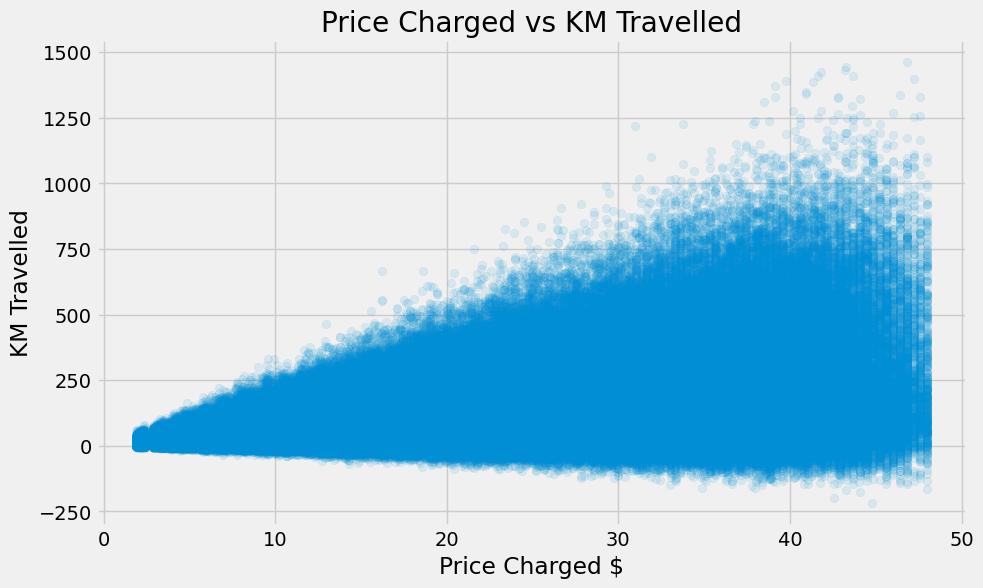

In [93]:
X = DataFrame(cab_df, columns=['KM Travelled'])
y = DataFrame(cab_df, columns=['Profit'])

plt.figure(figsize=(10,6))
plt.scatter(X, y, alpha=0.1)
plt.title('Price Charged vs KM Travelled')
plt.xlabel('Price Charged $')
plt.ylabel('KM Travelled')

plt.show()

### Regression Model

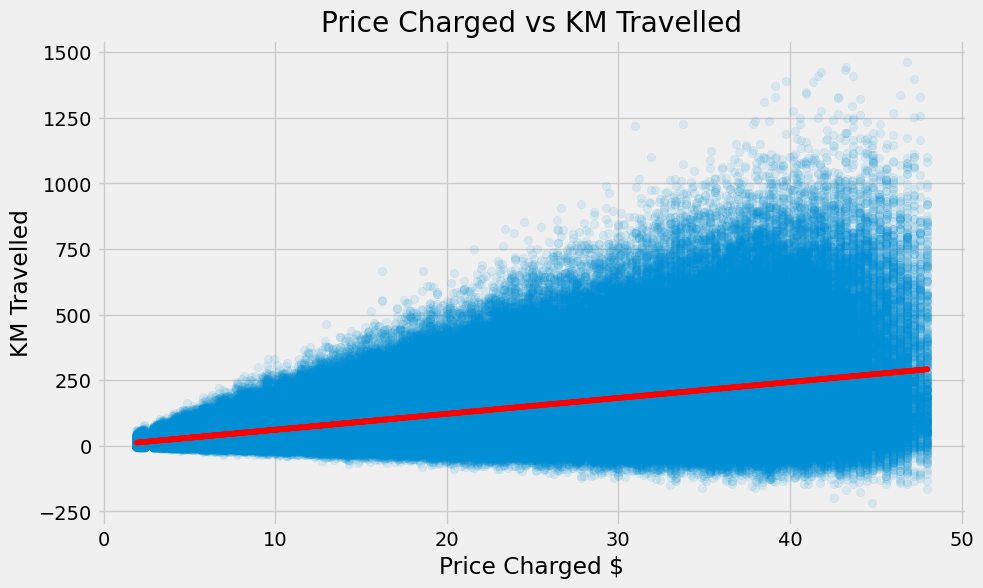

In [94]:
regression = LinearRegression()
regression.fit(X, y)

plt.figure(figsize=(10,6))
plt.scatter(X, y, alpha=0.1)
plt.plot(X, regression.predict(X), color='red', linewidth='4')

plt.title('Price Charged vs KM Travelled')
plt.xlabel('Price Charged $')
plt.ylabel('KM Travelled')

plt.show()

## Age Vs Income

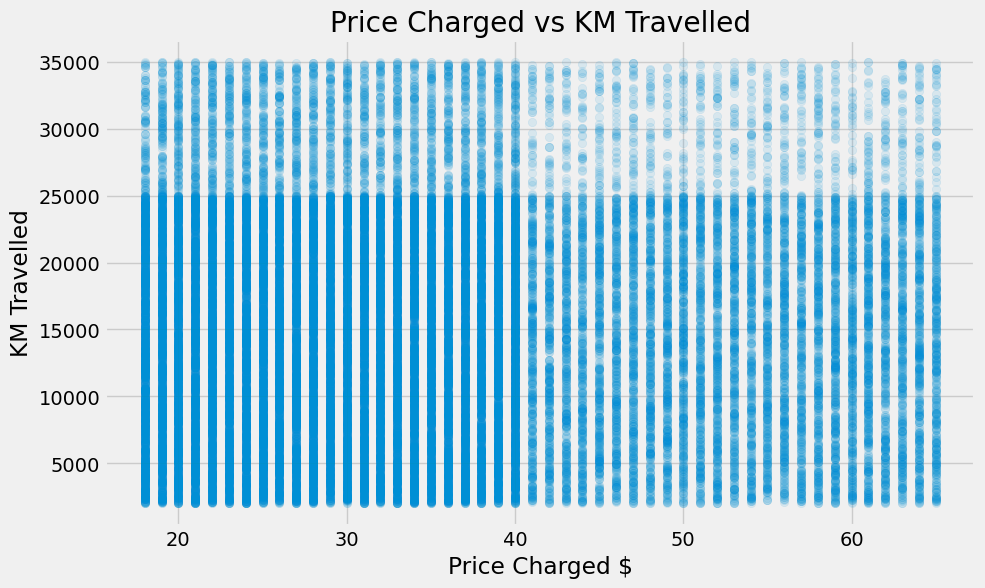

In [95]:
X = DataFrame(customer_id, columns=['Age'])
y = DataFrame(customer_id, columns=['Income (USD/Month)'])

plt.figure(figsize=(10,6))
plt.scatter(X, y, alpha=0.1)
plt.title('Price Charged vs KM Travelled')
plt.xlabel('Price Charged $')
plt.ylabel('KM Travelled')

plt.show()

### Regression Model

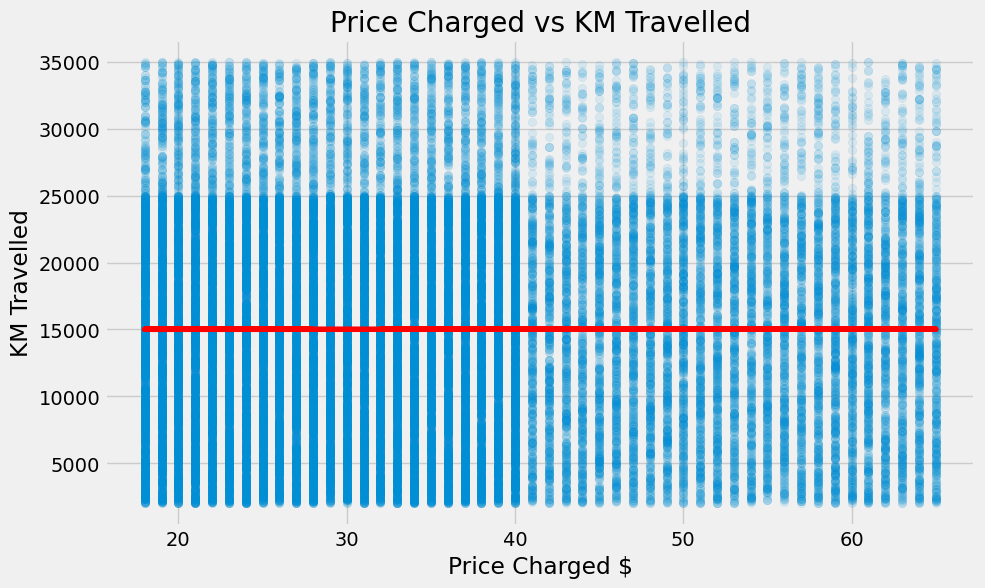

In [96]:
regression = LinearRegression()
regression.fit(X, y)

plt.figure(figsize=(10,6))
plt.scatter(X, y, alpha=0.1)
plt.plot(X, regression.predict(X), color='red', linewidth='4')

plt.title('Price Charged vs KM Travelled')
plt.xlabel('Price Charged $')
plt.ylabel('KM Travelled')

plt.show()

# Hypothesis Testing

## Parametric Tests

### Variables for Hypothesis Testing

In [98]:
# Subsets of Profit
yellow_profit = cab_df[cab_df['Company']== 1]
yellow_profit = yellow_profit["Profit"]

pink_profit = cab_df[cab_df['Company']== 2]
pink_profit = pink_profit["Profit"]

price = cab_df['Price Charged']
km_travelled = cab_df['KM Travelled']
profit = cab_df["Profit"]

cust_age = customer_id['Age']
cust_income = customer_id['Income (USD/Month)']

### One-Sample T-Test

In [99]:
from scipy.stats import ttest_1samp

In [132]:
t_test_value, p_value = ttest_1samp(yellow_profit, 160)

print("P Value:",p_value)

print("t-test Value:",t_test_value)

# 0.05 or 5% is significance level or alpha.
if p_value < 0.05: 

    print("Hypothesis Rejected")

else:
   
    print("Hypothesis Accepted")

P Value: 0.42777061853278586
t-test Value: 0.7930135409232102
Hypothesis Accepted


In [143]:
t_test_value, p_value = ttest_1samp(pink_profit, 63)

print("P Value:",p_value)

print("t-test Value:",t_test_value)

# 0.05 or 5% is significance level or alpha.
if p_value < 0.05: 

    print("Hypothesis Rejected")

else:
   
    print("Hypothesis Accepted")

P Value: 0.1919849777863045
t-test Value: -1.3047398904627412
Hypothesis Accepted


### Two-Sample T-Test

In [144]:
from scipy.stats import ttest_ind

In [150]:
# Compare samples

stat, p = ttest_ind(yellow_profit, pink_profit)

print("p-values:",p)

print("t-test:",stat)

# 0.05 or 5% is significance level or alpha.

if p < 0.05: 

    print("Hypothesis Rejected")

else:

    print("Hypothesis Accepted") 

p-values: 0.0
t-test: 160.37151759478064
Hypothesis Rejected


### Paired Sample T-Test

In [145]:
# paired test
from scipy.stats import ttest_rel

In [152]:
# Compare weights

stat, p = ttest_rel(profit, km_travelled)

print("p-values:",p)

print("t-test:",stat)

# 0.05 or 5% is the significance level or alpha.

if p < 0.05: 
    
    print("Hypothesis Rejected")

else:

    print("Hypothesis Accepted")

p-values: 0.0
t-test: 443.4837722066501
Hypothesis Rejected


### Anova T-Test

In [146]:
from scipy.stats import f_oneway

In [153]:
# Compare results using Oneway ANOVA
stat, p = f_oneway(price, km_travelled, profit)

print("p-values:", p)

print("ANOVA:", stat)

if p < 0.05: 
    
    print("Hypothesis Rejected")

else:

    print("Hypothesis Accepted")

p-values: 0.0
ANOVA: 454438.8578082141
Hypothesis Rejected


## Non-Parametrics Tests

### Mann-Whitney U Test

In [148]:
from scipy.stats import mannwhitneyu

In [157]:
# Apply Test

stat, p = mannwhitneyu(yellow_profit, pink_profit)

print("p-values:",p)

# 0.01 or 1% is significance level or alpha.

if p < 0.01: 

    print("Hypothesis Rejected")

else:
    print("Hypothesis Accepted")

p-values: 0.0
Hypothesis Rejected


### Wilcoxon Signed-Rank Test

In [149]:
from scipy.stats import wilcoxon

In [159]:
# Apply 
stat, p = wilcoxon(profit, km_travelled)

print("p-values:",p)

# 0.01 or 1% is significance level or alpha.

if p < 0.01: 

    print("Hypothesis Rejected")

else:
    print("Hypothesis Accepted")

p-values: 0.0
Hypothesis Rejected


### Kruskal-Wallis

In [161]:
from scipy.stats import kruskal

In [162]:
# Apply kruskal-wallis test
stat, p = kruskal(price, km_travelled, profit)

print("p-values:",p)

# 0.01 or 1% is significance level or alpha.

if p < 0.01: 

    print("Hypothesis Rejected")

else:
    print("Hypothesis Accepted")

p-values: 0.0
Hypothesis Rejected


# EDA Recommendation

**Insights**

Through our Exploratory Data Analysis of the Yellow and Pink cab companies
we have discovered several key insights.

* New York City generates the most revenue across all cities for both companies
* The difference between the price charged and cost of trip generates higher profit margins for Yellow Cab
* Both companies show lateral rise and decline in profits between 2016 and 2018
* NYC and Chicago customers have similar income ranges yet profits are exponentially higher in NYC
* The average age of customers across all cities is 35
* Customers pay for their fare with card and cash similarly with a slight preference for card payments

**Recommendations**

Based on the Exploratory Analysis there is a strong recommendation for retail investors to choose Yellow Cab for long term returns.

However, we would recommend Pink Cab for industry investors as there is strong potential for growth and expansion, and with enhanced management the profit margins can be higher than yellow cab given there is a similar profit margin charged for the cost of ride vs price charged.
